# Trying to explain 'lensing is too low' through baryonic effects 

using baryonification model to match lensing in measurements

[Saito et al. 2016](https://ui.adsabs.harvard.edu/abs/2016MNRAS.460.1457S/abstract) (for wp)

Lange et al. 2019 and Wibking et al. 2019 discuss 'lensing is low'

1) Use halo tools to generate an HOD and plot a CMASS like wp and DS

2) Apply the displacement model and redo wp and DS with the same HOD. How are the two plots different?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import ascii


## CMASS data 

In [2]:
data_dir = '/Users/fardila/Documents/GitHub/baryonic_effects/CMASS/data/'
wp_data_file = 'wpNSdebiasedboss5003.txt'
ds_data_file = 'cmass_deltasigma_0.43_0.7.txt'

In [18]:
wp_data = ascii.read(data_dir+wp_data_file, names = ['rp','wp','wp_err'])
ds_data = ascii.read(data_dir+ds_data_file, names = ['rp','ds','ds_err'])

## simulation: MDPL2 

### load catalogs 

TODO: add correct catalogs

In [ ]:
halo_cat = 
particle_cat = 

### create HOD 

TODO: adjust HOD model to match [Johannes' paper](https://ui.adsabs.harvard.edu/abs/2019MNRAS.488.5771L/abstract)

In [24]:
from halotools.empirical_models import PrebuiltHodModelFactory
from halotools.sim_manager import FakeSim
from halotools.mock_observables import return_xyz_formatted_array



In [25]:
model_instance = PrebuiltHodModelFactory('zheng07')

halocat = FakeSim()
model_instance.populate_mock(halocat)

model_instance.param_dict['logMmin'] = 12.1
model_instance.mock.populate()

/Users/fardila/anaconda/envs/baryonic_effects/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/Users/fardila/anaconda/envs/baryonic_effects/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/Users/fardila

In [39]:
x = model_instance.mock.galaxy_table['x']
y = model_instance.mock.galaxy_table['y']
z = model_instance.mock.galaxy_table['z']
all_positions = return_xyz_formatted_array(x, y, z)

In [43]:
px = model_instance.mock.ptcl_table['x']
py = model_instance.mock.ptcl_table['y']
pz = model_instance.mock.ptcl_table['z']

Nptcls_to_keep = int(1e4)
randomizer = np.random.random(len(model_instance.mock.ptcl_table))
sorted_randoms = np.sort(randomizer)
ptcl_mask = np.where(sorted_randoms < sorted_randoms[Nptcls_to_keep])[0]
particle_positions = return_xyz_formatted_array(px, py, pz, mask = ptcl_mask)

### measure clustering 

In [33]:
from halotools.mock_observables import wp

In [37]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_bin_centers = (rp_bins[:1] + rp_bins[1:])/2.


wp_all = wp(all_positions, rp_bins, pi_max, period=model_instance.mock.Lbox, num_threads='max')

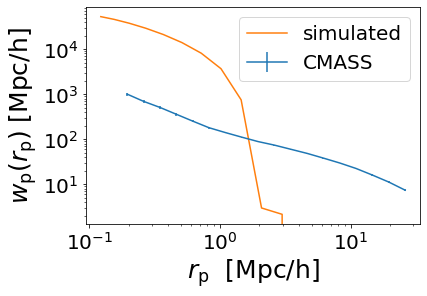

In [38]:
plt.errorbar(wp_data['rp'],wp_data['wp'], yerr = wp_data['wp_err'], label='CMASS')

plt.plot(rp_bin_centers, wp_all, label=r'simulated')

plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc/h]}$', fontsize=25)
plt.ylabel(r'$w_{\rm p}(r_{\rm p})$ $\rm{[Mpc/h]}$', fontsize=25)
# plt.title(r'$M_{\ast} > 10^{10.25}M_{\odot}$', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.show()


## measure weak lensing 

In [46]:
from halotools.mock_observables import delta_sigma

In [48]:
rp_bins = np.logspace(-1, 1, 15)

particle_masses = halocat.particle_mass
period=model_instance.mock.Lbox
downsampling_factor = (halocat.num_ptcl_per_dim**3)/float(len(particle_positions))

rp_bins = np.logspace(-1,1,15)

rp, result_mstar11_in_mpc = delta_sigma(all_positions, particle_positions,
                    particle_masses, downsampling_factor,
                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

length_unit_conversion = 1e6
result_mstar11_in_pc = result_mstar11_in_mpc/length_unit_conversion**2

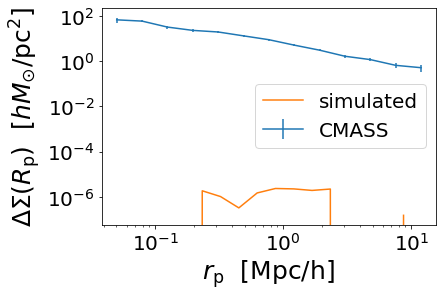

In [50]:

plt.errorbar(ds_data['rp'],ds_data['ds'], yerr = ds_data['ds_err'], label='CMASS')
plt.plot(rp, result_mstar11_in_pc, label='simulated')
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc/h]}$', fontsize=25)
plt.ylabel(r'$\Delta\Sigma(R_{\rm p})$  $[h M_{\odot} / {\rm pc}^2]$', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.show()